In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/ml-turbulence-dataset/komega.csv')

Let's visualize some fields for one of the periodic hills.

In [3]:
features = ['komega_I1_1','komega_I2_1','komega_I1_2','komega_I2_2','komega_I1_27','komega_I2_7']
label = ['labels_uu']

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
df_train = df[(df.Case.isin(['PHLL_case_0p5','PHLL_case_0p8','PHLL_case_1p5']))]
df_val = df[df.Case == 'PHLL_case_1p0']
df_test = df[df.Case == 'PHLL_case_1p2']

def preprocess_dataset(df,features,labels):
    df_train = df[(df.Case.isin(['PHLL_case_0p5','PHLL_case_0p8','PHLL_case_1p5']))]
    df_val = df[df.Case == 'PHLL_case_1p0']
    df_test = df[df.Case == 'PHLL_case_1p2']
        
    train_features = (df_train[features].values)
    train_labels = (df_train[labels].values)
    
    val_features = (df_val[features].values)
    val_labels = (df_val[labels].values)
    
    test_features = (df_test[features].values)
    test_labels = (df_test[labels].values)
    
    feature_scaler = StandardScaler()
    x_train = (feature_scaler.fit_transform(train_features))
    x_val = (feature_scaler.transform(val_features))
    x_test = (feature_scaler.transform(test_features))

    label_scaler = StandardScaler()
    y_train = (label_scaler.fit_transform(train_labels))
    y_val = (label_scaler.transform(val_labels))
    y_test = (label_scaler.transform(test_labels))    
    return x_train, y_train, x_val, y_val, x_test, y_test, feature_scaler, label_scaler


def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, label_scaler,train_predictions,val_predictions,test_predictions):
    fig = plt.figure(figsize=(15,5),constrained_layout=True)
    gs = fig.add_gridspec(2,2,hspace=0.,wspace=0.1)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[0,1])
    ax4 = fig.add_subplot(gs[1,1])
    
    
    print(f'Training set score: {mean_squared_error(label_scaler.inverse_transform(y_train),label_scaler.inverse_transform(train_predictions))}')
    print(f'Validation set score: {mean_squared_error(label_scaler.inverse_transform(y_val),label_scaler.inverse_transform(val_predictions))}')
    print('=========================')
    print(f'TEST SET SCORE: {mean_squared_error(label_scaler.inverse_transform(y_test),label_scaler.inverse_transform(test_predictions))}\n')

    
    ax1.tricontourf(df_val['komega_Cx'],df_val['komega_Cy'],label_scaler.inverse_transform(val_predictions)[:,0],vmax=5E-5,vmin=-5E-5)
    ax1.set_aspect(1)
    ax1.set_title('Predictions - validation set')
    ax2.tricontourf(df_val['komega_Cx'],df_val['komega_Cy'],df_val['labels_uu'],vmax=5E-5,vmin=-5E-5)
    ax2.set_aspect(1)
    ax2.set_title('Truth - validation set')
    ax3.tricontourf(df_test['komega_Cx'],df_test['komega_Cy'],label_scaler.inverse_transform(test_predictions)[:,0],vmax=5E-5,vmin=-5E-5)
    ax3.set_aspect(1)
    ax3.set_title('Predictions - test set')
    ax4.tricontourf(df_test['komega_Cx'],df_test['komega_Cy'],df_test['labels_uu'],vmax=5E-5,vmin=-5E-5)
    ax4.set_aspect(1)
    ax4.set_title('Truth - test set')


## SVM Implementation

SVM is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates different classes in the feature space, maximizing the margin between the closest data points of different classes. In classification, SVM aims to classify data points by finding the best decision boundary, while in regression (Support Vector Regression), it aims to fit a hyperplane that best fits the data points, balancing between fitting the data well and maintaining a smooth function.

sklearn.svm.SVR is a module in the scikit-learn library specifically for Support Vector Regression. It provides an implementation of Support Vector Regression for solving regression problems. It allows you to train a regression model using the SVM algorithm, enabling you to predict continuous outcomes based on input features.

In [5]:
from sklearn.svm import SVR
features = ['komega_I1_1','komega_I2_1','komega_I1_2','komega_I2_2','komega_I1_27','komega_I2_7']
labels = ['labels_uu']
x_train, y_train, x_val, y_val, x_test, y_test, feature_scaler, label_scaler = preprocess_dataset(df,features,labels)

model = SVR()
model.fit(x_train,y_train.ravel())
train_predictions = model.predict(x_train)
val_predictions = model.predict(x_val)
test_predictions = model.predict(x_test)

In [6]:
train_predictions=train_predictions.reshape((-1,1))
val_predictions=val_predictions.reshape((-1,1))
test_predictions=test_predictions.reshape((-1,1))

Training set score: 1.2486142999705085e-10
Validation set score: 1.0013787357001949e-10
TEST SET SCORE: 9.797170071435593e-11



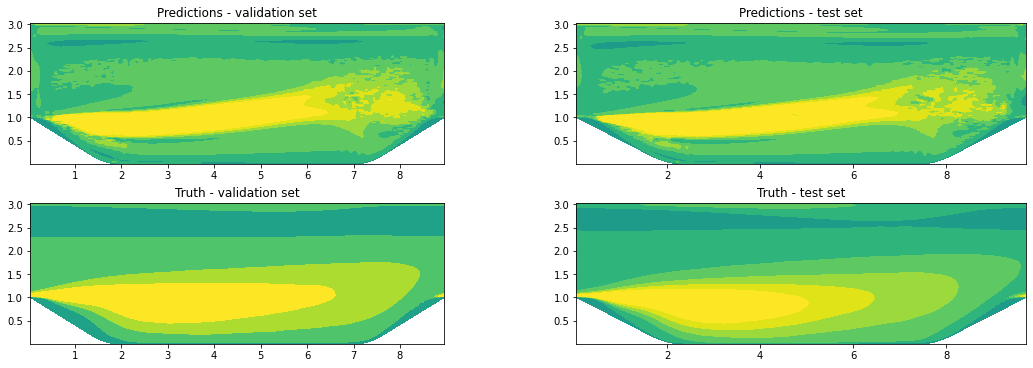

In [7]:
evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, label_scaler,train_predictions,val_predictions,test_predictions)